In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

# Objective:
# The objective of this assessment is to evaluate the understanding and application of clustering techniques on the Iris dataset.


In [2]:
# Load the Iris dataset
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Standardizing the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [5]:
# Display first few rows of the dataset
print("First five rows of the preprocessed dataset:")
print(pd.DataFrame(data_scaled, columns=iris.feature_names).head())

First five rows of the preprocessed dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


KMeans is a partition-based clustering algorithm that divides data into 
𝑘
k clusters by minimizing the variance within each cluster. It assigns each data point to the nearest cluster centroid and updates centroids iteratively until convergence.

 KMeans clustering partitions the dataset into K distinct clusters by minimizing variance within clusters.
# It is suitable for the Iris dataset as the data naturally clusters into three groups corresponding to the species.

In [17]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)

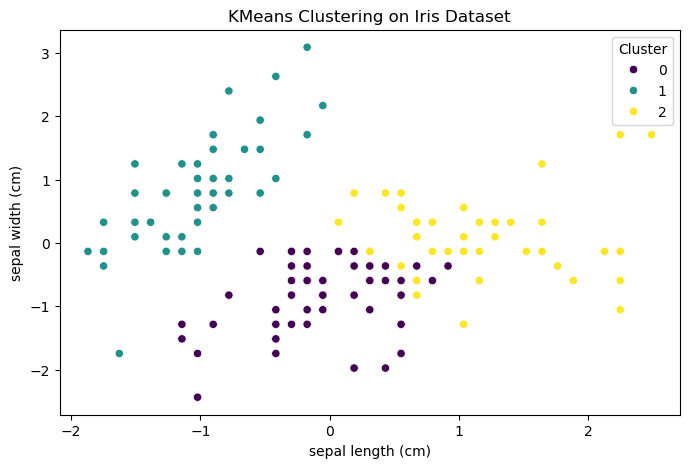

In [18]:
# Visualizing KMeans Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=kmeans_labels, palette='viridis')
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()

# Hierarchical Clustering
# Hierarchical clustering builds a hierarchy of clusters either in an agglomerative (bottom-up) or divisive (top-down) approach.
# It is useful for the Iris dataset as it can help understand relationships between clusters and does not require specifying the number of clusters beforehand.

In [8]:
# Hierarchical Clustering
# Hierarchical clustering builds a hierarchy of clusters either in an agglomerative (bottom-up) or divisive (top-down) approach.
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(data_scaled)

In [15]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [16]:
# KMeans Clustering
# KMeans clustering partitions the dataset into K distinct clusters by minimizing variance within clusters.
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(data_scaled)

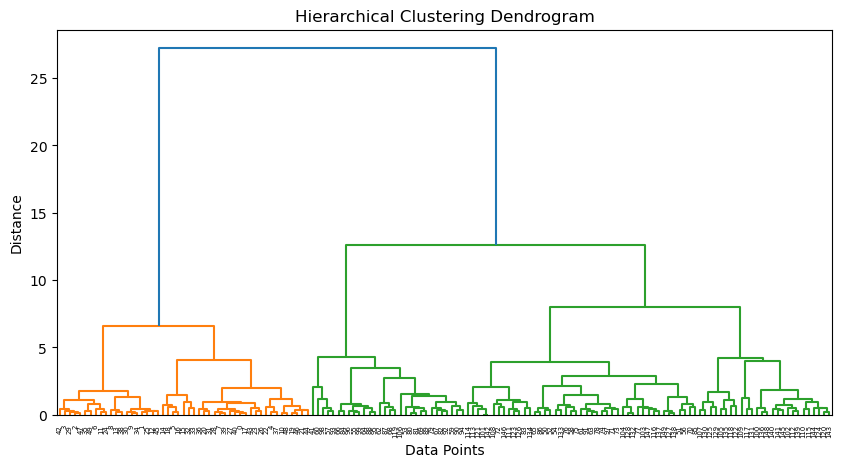

In [9]:
# Dendrogram
plt.figure(figsize=(10, 5))
linkage_matrix = linkage(data_scaled, method='ward')
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

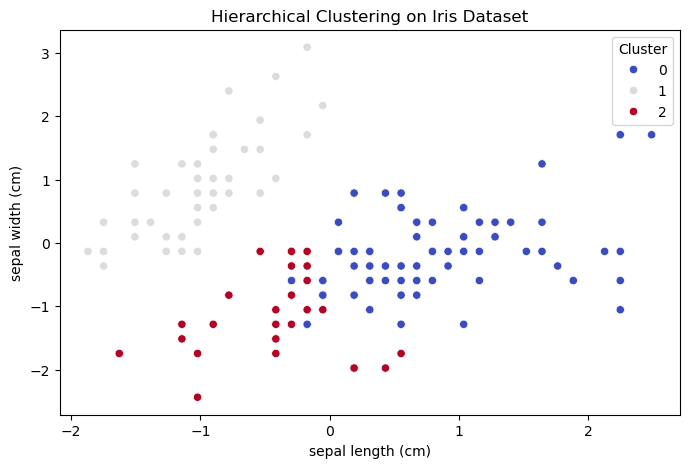

In [10]:
# Visualizing Hierarchical Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data_scaled[:, 0], y=data_scaled[:, 1], hue=hierarchical_labels, palette='coolwarm')
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()
